In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [6]:
client = MongoClient()
db = client['yelp']
user = db['user']
bus = db['business']
rev = db['review']

In [70]:
print('Records in user: {}'.format(user.count_documents({})))
print('Records in bus:  {}'.format(bus.count_documents({})))
print('Records in rev:  {}'.format(rev.count_documents({})))

Records in user: 1637138
Records in bus:  192609
Records in rev:  6685900


In [7]:
print(user.find_one())

{'_id': ObjectId('5e38340c9a6a0b2983468f5e'), 'user_id': 'bc8C_eETBWL0olvFSJJd0w', 'name': 'David', 'review_count': 16, 'yelping_since': '2013-10-04 00:16:10', 'useful': 28, 'funny': 8, 'cool': 10, 'elite': '', 'friends': '4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng, lwhksSpgIyeYZor_HlN93w, v281gE-nk3jozr_5hWFAug, V7XFwm0baX37HRIduHmrXw, haSh72Q0MsQZUpWPeVgp0Q, bLbSNkLggFnqwNNzzq-Ijw, EKnCY7Tfxts4dexPrz63OQ, u_wqt9RshdZsoj8ikLqoEQ, J8FKQM1yvbwoKcuWRNh1yw, S9tC7Bp2sOLF_nwH-ksiIg, vNGs6_DP7ZbtPwX7finVIQ, 1IQ_d1RuMj8iIpcF2CDohA, WJqVJqhh7vNX51xLHEMEoQ, 5OllWsrKJsYo3XQK6siRKA', 'fans': 0, 'average_stars': 3.71, 'compliment_hot': 0, 'compliment_more': 0, 'compliment_profile': 0, 'compliment_cute': 0, 'compliment_list': 0, 'compliment_note': 1, 'compliment_plain': 0, 'compliment_cool': 0, 'compliment_funny': 0, 'compliment_writer': 0, 'compliment_photos': 0}


In [79]:
def load_subsample(collection, n_rows, new_collection):
    "Creates a new collection from a subset of the original dataset."
    
    r_samp = collection.aggregate([{"$sample": {"size": n_rows}}])

    for doc in r_samp:
        new_collection.insert_one(doc)

In [81]:
# Creating smaller samples for first pass

user_50k = db['user_50k']
rev_50k = db['rev_50k']
# bus_50k = db['bus_50k']

load_subsample(user, 50000, user_50k)
load_subsample(rev, 50000, rev_50k)
# load_subsample(bus, 50000, bus_50k)

In [82]:
rev_50k.count()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


50000

In [83]:
sample = rev_50k.find({}, limit=10)
print(list(sample))

[{'_id': ObjectId('5e38379a23e45989b9f8d6a6'), 'review_id': 'SW4MOF-LNsaO3fu5m7wKdg', 'user_id': 'uUdz50968e_R3k1LExcgYw', 'business_id': '148d7J-cFejkhYV89y3Jsg', 'stars': 2.0, 'useful': 2, 'funny': 0, 'cool': 0, 'text': "Okay it's hard only putting two stars, but I think the price you pay is ridiculous. They charge you a pretty decent chunk of money for 2 people, and you have to ride with 2 other complete strangers...unless you want to cough up some more cash for a private gondola, AND you're also encouraged to tip them. Plus they take pictures of you, but expect you to pay $22 for ONE picture...yeah no. Anyway, the ride was maybe 10 minutes, we went on the outdoor one. It was a really nice day out and I thought it was neat how they sang to you and the Venetian is gorgeous, but still the price is crazy for what you get. I would say if you have the money, go for it, it's nice but not worth the price for the amount of time you get and sitting with people you don't know.", 'date': '2013

In [88]:
df = pd.DataFrame(list(rev_50k.find({}, {
                                        "review_id": 1,
                                        "user_id": 1,
                                        "stars": 1,
                                        "text": 1})))

In [89]:
df.head()

_id               review_id                 user_id  \
0  5e38379a23e45989b9f8d6a6  SW4MOF-LNsaO3fu5m7wKdg  uUdz50968e_R3k1LExcgYw   
1  5e38381d23e45989b93319d1  RQLpnu49uvMlz1f3GA9WZA  tI7hrrkhSHbDzXFf_awgKQ   
2  5e38374023e45989b9d0e943  qMTb4sNMlJVyRlJup1Sj5w  jgbQAX6KihBLyjGw_hCD-g   
3  5e38374a23e45989b9d5bb0a  jDCkVChVxJg09Jb187ECBQ  pOz8G2ezXNRx-yCyRi-0Dg   
4  5e3837a023e45989b9fb6f63  B2zN4SmUGCy3mkGMNxz8pg  os3Q5QS-pkxpIwVeeTB3kA   

   stars                                               text  
0    2.0  Okay it's hard only putting two stars, but I t...  
1    5.0  Kind of an interesting place - I think it remi...  
2    5.0  I visit Jerry often and believe he serves up o...  
3    3.0  After hearing nothing but good things about th...  
4    1.0  It's cute inside and much bigger than it looks...

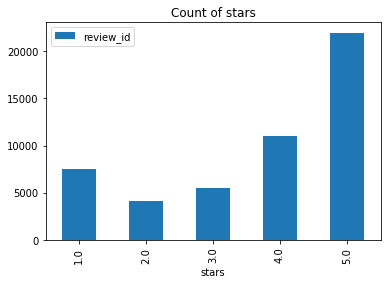

In [96]:
_ = df[['stars', 'review_id']].groupby('stars').count().plot(kind='bar', title='Count of stars')